In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("../data/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.drop(columns=["b"], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## EDA

Text(0, 0.5, 'Frequency')

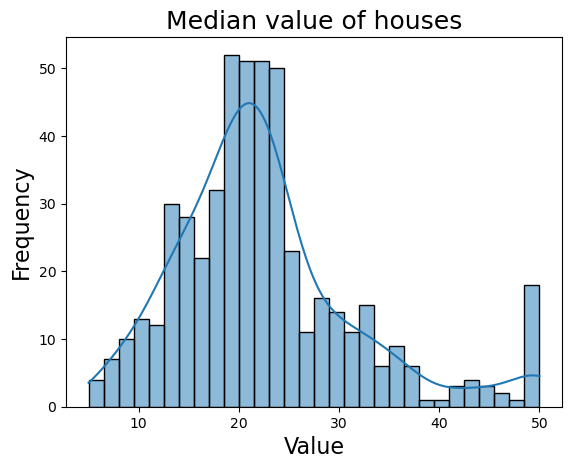

In [10]:
sns.histplot(df['medv'], bins=30, kde=True)
plt.title('Median value of houses', fontsize=18)
plt.xlabel('Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [11]:
X = df.drop(columns=["medv"], axis=1)
y = df["medv"]

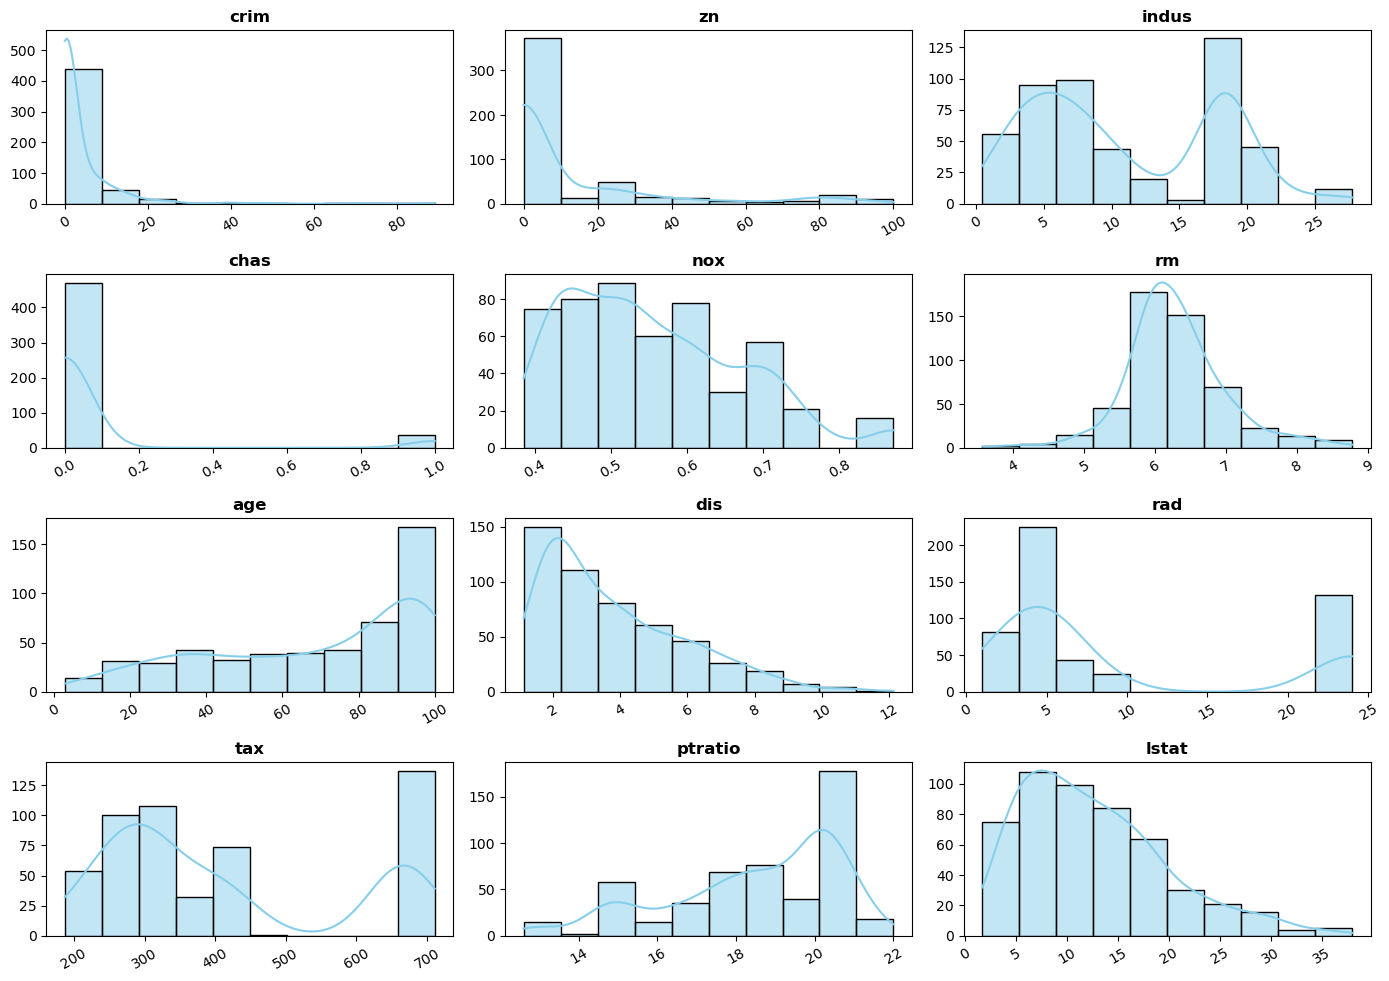

In [18]:
plt.figure(figsize=(14, 12))

# Iterate over columns and plot
for i, col in enumerate(X.columns, 1):
    plt.subplot(5, 3, i)  # Create subplots dynamically
    sns.histplot(data=df, x=col, kde=True, bins=10, color='skyblue')  # Add histograms
    plt.title(col, weight='bold', fontsize=12)  # Adjust font size for better readability
    plt.ylabel("")  # Remove redundant y-axis label
    plt.xlabel("")  # Remove redundant x-axis label
    plt.xticks(rotation=30, fontsize=10)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=10)  # Adjust y-axis ticks size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [15]:
df.nunique().sort_values()

chas         2
rad          9
zn          26
ptratio     46
tax         66
indus       76
nox         81
medv       229
age        356
dis        412
rm         446
lstat      455
crim       504
dtype: int64

In [17]:
df["rad"].value_counts().sort_values(ascending=False)

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: rad, dtype: int64

From the plots above, we can see that chas and rad have <15 unique values. However, we could just treat them all as numerical.

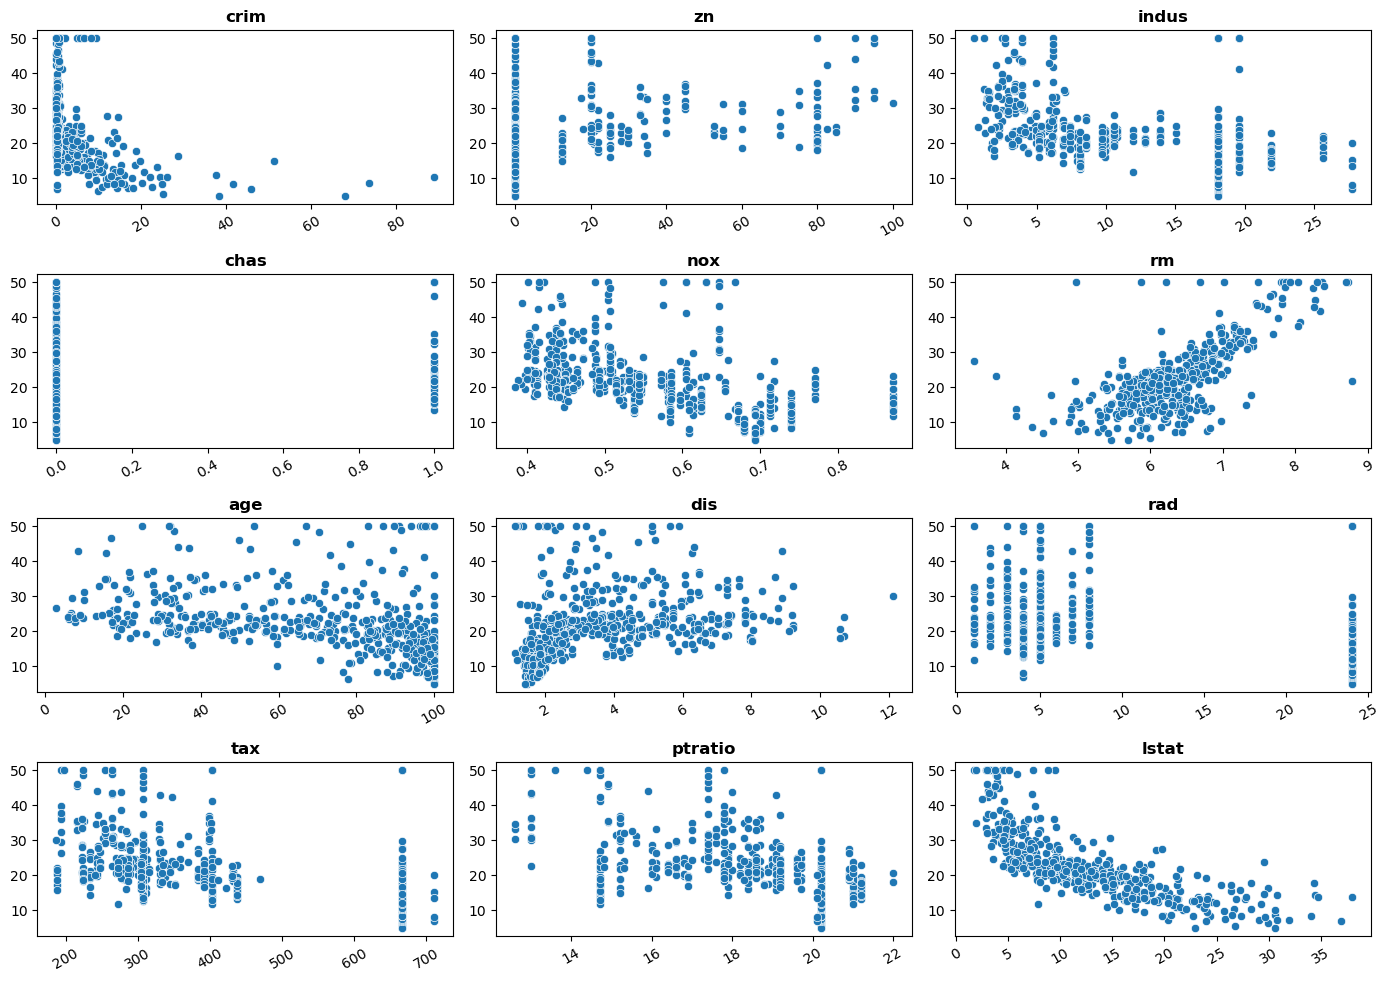

In [19]:
plt.figure(figsize=(14, 12))

# Iterate over columns and plot
for i, col in enumerate(X.columns, 1):
    plt.subplot(5, 3, i)  # Create subplots dynamically
    #sns.histplot(data=df, x=col, kde=True, bins=10, color='skyblue') 
    sns.scatterplot(data=df, x=col, y="medv")# Add histograms
    plt.title(col, weight='bold', fontsize=12)  # Adjust font size for better readability
    plt.ylabel("")  # Remove redundant y-axis label
    plt.xlabel("")  # Remove redundant x-axis label
    plt.xticks(rotation=30, fontsize=10)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=10)  # Adjust y-axis ticks size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  4.772599769922683


In [34]:
y_pred = lr.predict(X_train)

print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

RMSE:  4.754396542087904


In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  2.8298986748298827


**Note:** The random forest model is better for this type of data since the relationship between some variables and the target variable is not linear.

In [33]:
y_pred = rf.predict(X_train)

print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

RMSE:  1.4075740391690141


However, this random forest is overfitting the data. We might need to do some hyperparameter tunning to improve it. Whereas the linear regression model is not overfitting.